# CNN을 활용한 이미지 분류 프로젝트

### 요리 이미지 판정 방법
- 1) 사진에 어떤 요리가 있는지 분류 – 피자, 스파게티, 스시 3종류의 요리 학습
- 2) 판정한 요리의 칼로리를 출력

### 요리 이미지 데이터 수집
- 피자, 스파게티, 스시 3가지 종류 요리 => 음식당 100장 이상의 사진 필요
- Flickr 사이트 이용
    - Flickr가 제공하는 사진검색 API를 사용하여 요리사진 수집
    - 사이트 : https://www.flickr.com/

# CNN을 활용한 이미지 분류 프로젝트 

## 1. 데이타 준비 및 정리

### 1) Flickr API를 사용해 사진 수집
### (1) Flickr API 계정 만들기 
- 구글 아이디로 계정 만들기 
- Flickr API 계정 만들기 https://www.flickr.com/services/api/

### Flickr API 모듈 설치하기
- pip install flickrapi

In [1]:
# 경고(worning) 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 현재 작업 디렉토리 확인하기
import os
os.getcwd()

'/Users/jeseung/Documents/Computer_Learnig/딥러닝 실무/1. CNN_요리이미지분류'

### (2) Flickr API를 이용하여 요리 이미지 내려 받기 
- 피자, 스파게티, 스시 3가지 요리당 75X75 픽셀의 정사각형 이미지를 300개씩 내려 받기
- ./image/pizza, ./image/spaghetti, ./image/sushi 폴더 생성
<img src="./img/이미지다운로드.jpg" width=600 align=left>

In [5]:
# Flickr로 사진 검색해서 다운로드하기
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

# API 키 지정하기
key = "6d05bacfa5143672199cd80a67f9cc48"
secret = "507801379dbd3e99"
wait_time = 1 # 대기 시간(초)

# image 디렉토리가 존재하지 않은 경우에만 디렉토리 생성
if not os.path.exists('./image/'):
    os.mkdir('./image/')

# Flickr API로 사진 검색하고 './image' 아래에 요리 이름 폴더별로 저장하기
def go_download(keyword, dir):  # go_download('피자', 'pizza')     
    # 저장 경로 지정하기
    savedir = "./image/" + dir  # "./image/pizza"   
    
    # 디렉토리가 존재하지 않은 경우에만 디렉토리 생성    
    if not os.path.exists(savedir):
        os.mkdir(savedir)    
        
    # API를 사용해서 json 형태의 데이타 다운로드하기 
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
      text = keyword,     # 키워드
      per_page = 200,     # 검색할 개수
      media = 'photos',   # 사진 검색
      sort = "relevance", # 키워드 관련도 순서
      safe_search = 1,    # 안전 검색
      extras = 'url_q, license')
    
    # 결과 확인하기
    photos = res['photos']
    pprint(photos)
    
    try:
      # 1장씩 다운로드하기 
      for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = savedir + '/' + dir + '_' + str(i) + '.jpg'
        if os.path.exists(filepath): continue
        print(str(i+1) + ":download=", url_q)
        urlretrieve(url_q, filepath)
        time.sleep(wait_time)
    except:
        import traceback
        traceback.print_exc()
        
# 키워드와 디렉터리 이름 지정해서 다운로드하기 
def main():
#    go_download('피자', 'pizza')
     go_download('스파게티', 'spaghetti')
     go_download('스시', 'sushi')

# 메인 프로그램     
if __name__ == '__main__':
    main()

{'page': 1,
 'pages': 4,
 'perpage': 200,
 'photo': [{'farm': 8,
            'height_q': 150,
            'id': '7209511582',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '6',
            'owner': '69329210@N02',
            'secret': '505e1a1796',
            'server': '7074',
            'title': '스파게티 버섯버전2',
            'url_q': 'https://live.staticflickr.com/7074/7209511582_505e1a1796_q.jpg',
            'width_q': 150},
           {'farm': 8,
            'height_q': 150,
            'id': '7001287542',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '6',
            'owner': '69329210@N02',
            'secret': '8841101d25',
            'server': '7068',
            'title': '또다른 스파게티',
            'url_q': 'https://live.staticflickr.com/7068/7001287542_8841101d25_q.jpg',
            'width_q': 150},
           {'farm': 8,
            'height_q': 150,
            'i

15:download= https://live.staticflickr.com/8171/7904275082_819d187bdd_q.jpg
18:download= https://live.staticflickr.com/2179/1722837860_03651ef92b_q.jpg
19:download= https://live.staticflickr.com/2061/1722896782_a5cce92108_q.jpg
22:download= https://live.staticflickr.com/4092/5001020776_a23ec057b3_q.jpg
23:download= https://live.staticflickr.com/7209/6871033885_2ab30a6706_q.jpg
30:download= https://live.staticflickr.com/2160/2073326773_3df20b7405_q.jpg
36:download= https://live.staticflickr.com/7530/15375940033_0669314939_q.jpg
41:download= https://live.staticflickr.com/1220/1371919834_af3b27e286_q.jpg
47:download= https://live.staticflickr.com/7456/26416183164_e572c91fb4_q.jpg
48:download= https://live.staticflickr.com/1582/23866252603_3da317babf_q.jpg
49:download= https://live.staticflickr.com/2530/4183439007_ea674b9d41_q.jpg
50:download= https://live.staticflickr.com/7550/28035085890_5b7ac50d06_q.jpg
51:download= https://live.staticflickr.com/5656/22119348201_63cbd408a4_q.jpg
53:down

2:download= https://live.staticflickr.com/5803/22707816333_c7d4341133_q.jpg
3:download= https://live.staticflickr.com/4054/4613588369_f20587cdc7_q.jpg
4:download= https://live.staticflickr.com/610/23226644912_ff2544b0db_q.jpg
5:download= https://live.staticflickr.com/3089/2520058940_5f4d2bdd31_q.jpg
6:download= https://live.staticflickr.com/3713/12046009365_692b6624eb_q.jpg
9:download= https://live.staticflickr.com/2734/4332817170_245fb0a1a0_q.jpg
11:download= https://live.staticflickr.com/8075/8260002382_64ede31d22_q.jpg
13:download= https://live.staticflickr.com/4121/4914650194_f8d2874b08_q.jpg
14:download= https://live.staticflickr.com/4323/35159195444_17e30a35b0_q.jpg
15:download= https://live.staticflickr.com/7288/8737578731_9c7874e30d_q.jpg
16:download= https://live.staticflickr.com/4299/35828039922_a883bfc176_q.jpg
17:download= https://live.staticflickr.com/3445/3844857716_a614854b96_q.jpg
18:download= https://live.staticflickr.com/1668/26122031213_5da979446b_q.jpg
21:download= 

### (3) 사진 정리하기(클린징)
- 제대로 된 사진 100개만 남기기 
- 대상이 크게 나오고 다른 물체가 안나오고 색이 선명한 것 위주로 선택
- 필터를 심하게 적용해 색상이 이상하거나 흑백 이미지는 제거

In [7]:
# 디렉토리 안의 이미지 파일 수 확인하기
import os, glob

path1 = "./image/pizza/"
path2 = "./image/spaghetti/"
path3 = "./image/sushi/"

# for img in glob.glob(path1 + "/*.jpg"):
#     print(img)
               
print("pizza: ", len(glob.glob(path1 + "/*.jpg")))
print("spaghetti: ", len(glob.glob(path2 + "/*.jpg")))
print("sushi: ", len(glob.glob(path3 + "/*.jpg")))

pizza:  126
spaghetti:  156
sushi:  163


### 2) Numpy 형식으로 이미지 데이타 저장하기
- 요리 사진을 데이터 셋으로 활용할 수 있게 Numpy 형식으로 변환하여 파일로 저장

#### 작업 순서
- 1) 요리 이미지가 컬러 이미지이므로 RGB 컬러로 변환
- 2) RBG의 각 색상 값을 0~1까지의 실수로 변환
- 3) 레이블 설정 - 0 : 피자, 1 : 스파게티, 2 : 스시
- 4) image 디렉토리에 “photos.npz” 라는 Numpy 형식의 파일로 저장

In [8]:
# 이미지들을 NumPy 형식으로 변환하기
import numpy as np
from PIL import Image
import os, glob, random

outfile = "image/photos.npz" # 저장할 파일 이름
max_photo = 100 # 사용할 이미지 수
photo_size = 32 # 이미지 크기
x = [] # 이미지 데이터
y = [] # 레이블 데이터

def main():    
    # 디렉터리 읽어 들이기 
    glob_files("./image/pizza", 0)     # 레이블 설정 - glob_files("폴더명", 레이블)
    glob_files("./image/spaghetti", 1)
    glob_files("./image/sushi", 2)
    
    # 파일로 저장하기 
    np.savez(outfile, x=x, y=y)  # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를", "저장했습니다. 파일명 :" + outfile)

# path 내부의 이미지 읽어 들이기 
def glob_files(path, label):        # glob_files("./image/pizza", 0)
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    # 파일 처리하기
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        # 이미지 파일 읽어 들이기
        img = Image.open(f)
        img = img.convert("RGB") # RGB 컬러로 변환하기
        img = img.resize((photo_size, photo_size)) # 크기 변경하기 - 32X32
        img = np.asarray(img) # RBG의 각 색상 값을 0~1까지의 실수로 변환
        x.append(img)
        y.append(label)
        
# 메인 프로그램     
if __name__ == '__main__':
    main()

300개의 이미지를 저장했습니다. 파일명 :image/photos.npz


#### Numpy로 저장된 이미지 확인하기

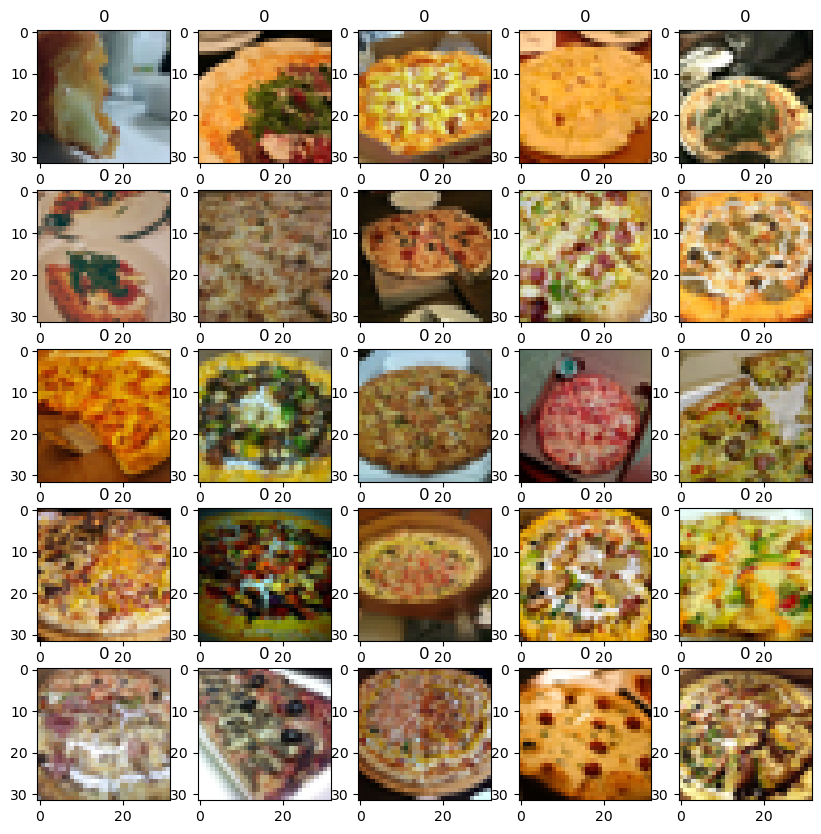

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 사진 데이타 읽어 들이기
photos = np.load("image/photos.npz")
x = photos["x"]
y = photos["y"]

# 시작 인덱스 
idx = 0  # 100 or 200으로 변경하여 다른 이미지도 확인하기

# pyplot으로 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
    
plt.show()        

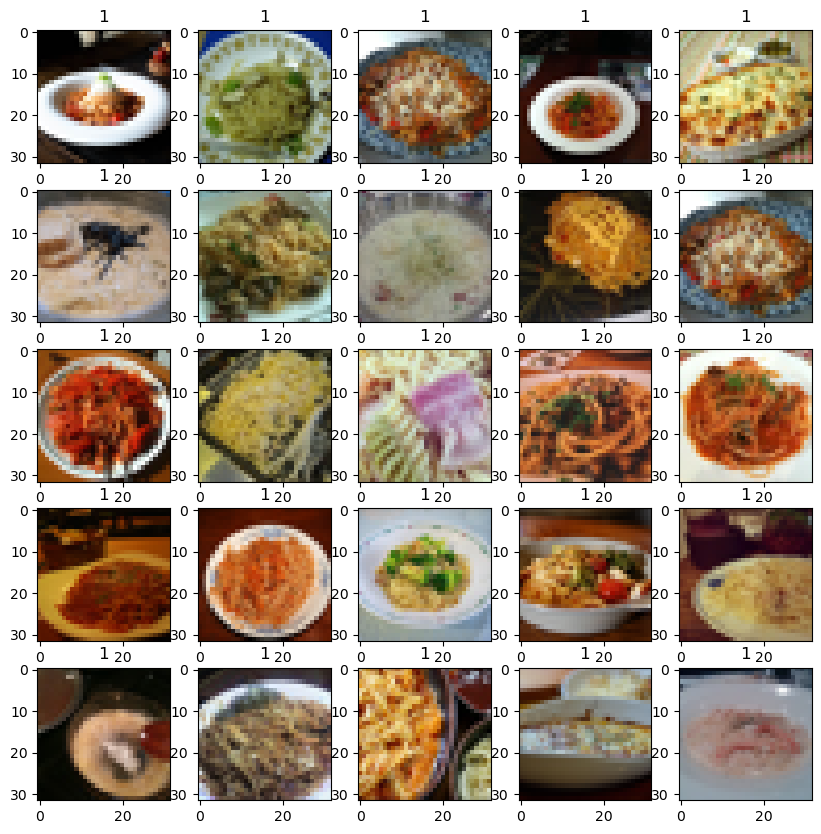

In [4]:
# 시작 인덱스
idx = 100  # 100 or 200으로 변경하여 다른 이미지도 확인하기

# pyplot으로 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
    
plt.show()   

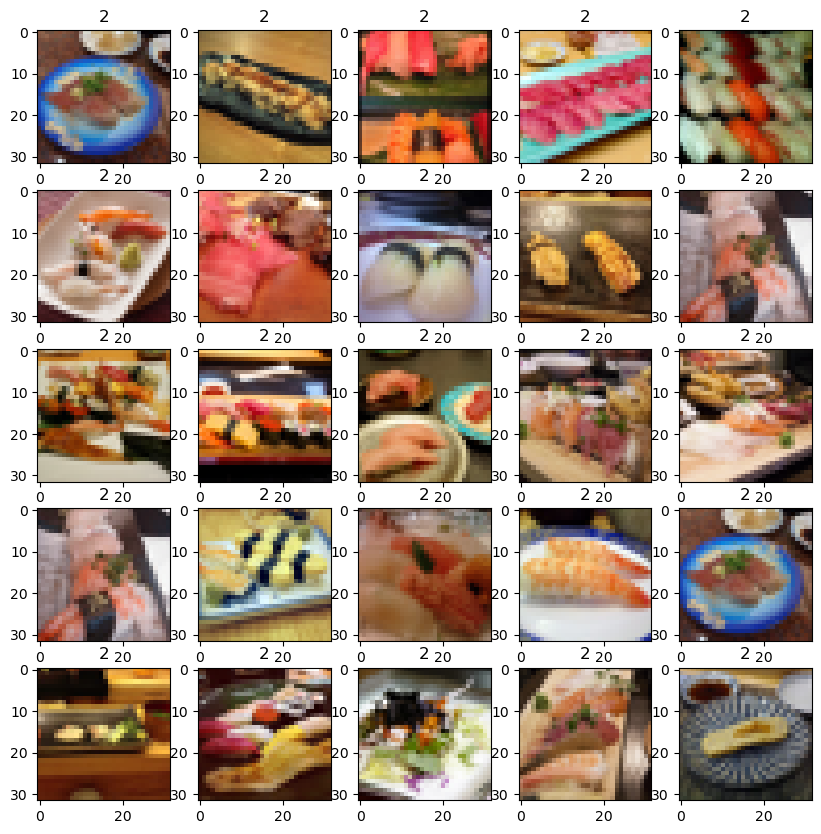

In [5]:
# 시작 인덱스
idx = 200  # 100 or 200으로 변경하여 다른 이미지도 확인하기

# pyplot으로 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
    
plt.show()   

### 3) 데이타 전처리 
- 속성(피처) 데이터 - 1차원에서 3차원 배열로 변환, 정규화
- 레이블 - 원-핫 인코딩 형식으로 변환 

In [6]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 입력 데이타와 출력 데이타 지정
im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간(RGB)
in_shape = (im_rows, im_cols, im_color) # (32, 32, 3) # 입력 데이타
nb_classes = 3 # 출력 데이타 수, 3종류의 요리

# 사진 데이터 읽어 들이기 
photos = np.load('image/photos.npz')
X = photos['x']
y = photos['y']

# x 속성(피처) 데이터를 1차원에서 3차원 배열로 변환 및 정규화하기 
X = x.reshape(-1, im_rows, im_cols, im_color)
X = x.astype('float32') / 255

# y 레이블을 원-핫 인코딩 형식으로 변환하기 
y = to_categorical(y.astype('int32'), nb_classes) # nb_classes=3

### 4) 데이타 구분
- 학습데이타셋, 검증데이타셋, 테스트데이타셋으로 구분

In [7]:
# 전체 데이타셋을 학습 데이타셋과 테스트셋으로 구분하기 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

# 학습데이타셋을 학습데이셋과 검증데이타셋으로 구분하기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2,
                                                  random_state=0)
# 데이타셋 형태 확인
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(192, 32, 32, 3) (192, 3)
(48, 32, 32, 3) (48, 3)
(60, 32, 32, 3) (60, 3)


## 2. CNN 모델 정의, 컴파일 설정
- cnn_model.py 파일로 저장

In [8]:
# cnn_model.py 파일 코드
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# CNN 모델 정의하기
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# 컴파일하고 모델 반환하기
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(1e-4),
        metrics=['acc'])
    return model

## 3. CNN 모델 학습
- 주피터에서 [Kernel --> Restart] 클릭하여 커널을 재시작한 후 실행
- 정답률이 너무 안좋은 경우는 이미지 클리닝을 한 후 다시 실행하기

### 1) ModelCheckpoint, Early_stopping  지정

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 딥러닝 모델을 저장할 디렉토리(폴더) 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/CNN_Cooking.hdf5"
# 가장 좋을 때 하나만 학습해라
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# EarlyStopping == 10개씩 비교하면서 가장 좋은 데이터 값으로 공부하고 최상의 값으로 판단되면 stop
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 2) 모델 학습

In [10]:
import cnn_model  # 내가 만든 CNN 모델 import 하기

im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color) # (32, 32, 3) # 입력 데이타
nb_classes = 3 # 출력 데이타 수, 3종류의 요리

# CNN 모델 만들기 
model = cnn_model.get_model(in_shape, nb_classes)

# 모델 학습
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30


2023-07-19 15:01:27.258398: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - ETA: 0s - loss: 1.1025 - acc: 0.3594
Epoch 1: val_loss improved from inf to 1.10751, saving model to ./model/CNN_Cooking.hdf5
6/6 [==============================] - 1s 50ms/step - loss: 1.1025 - acc: 0.3594 - val_loss: 1.1075 - val_acc: 0.2708
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 1.0957 - acc: 0.3906
Epoch 2: val_loss improved from 1.10751 to 1.10558, saving model to ./model/CNN_Cooking.hdf5
6/6 [==============================] - 0s 32ms/step - loss: 1.0957 - acc: 0.3906 - val_loss: 1.1056 - val_acc: 0.3542
Epoch 3/30
4/6 [===================>..........] - ETA: 0s - loss: 1.1143 - acc: 0.2891
Epoch 3: val_loss improved from 1.10558 to 1.10522, saving model to ./model/CNN_Cooking.hdf5
6/6 [==============================] - 0s 32ms/step - loss: 1.1045 - acc: 0.3229 - val_loss: 1.1052 - val_acc: 0.2708
Epoch 4/30
4/6 [===================>..........] - ETA: 0s - loss: 1.0898 - acc: 0.4062
Epoch 4: val_loss did not improve 

Epoch 30/30
6/6 [==============================] - ETA: 0s - loss: 0.9431 - acc: 0.5469
Epoch 30: val_loss did not improve from 0.91902
6/6 [==============================] - 0s 28ms/step - loss: 0.9431 - acc: 0.5469 - val_loss: 0.9635 - val_acc: 0.4167


## 5. 모델 평가

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 =', score[1], 'loss =', score[0])

2/2 [==============================] - 0s 12ms/step - loss: 1.0091 - acc: 0.5500
정답률 = 0.550000011920929 loss = 1.0090534687042236


### 학습 과정 시각화

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

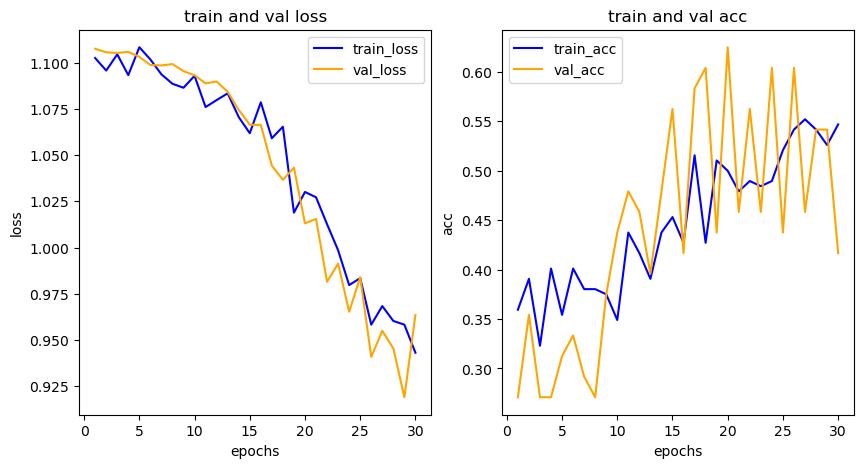

In [12]:
# 학습 상태를 그래프로 그리기 
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

## 6. 이미지 증식 하기
- 정답률을 높이기 위해서 데이타 수량을 늘려서 진행
- 사진을 회전하거나 반전시켜서 데이타 수량을 늘리기

### OpenCV를 사용하여 이미지를 0~180도까지 회전
- opencv-python 모듈 설치 : pip install opencv-python

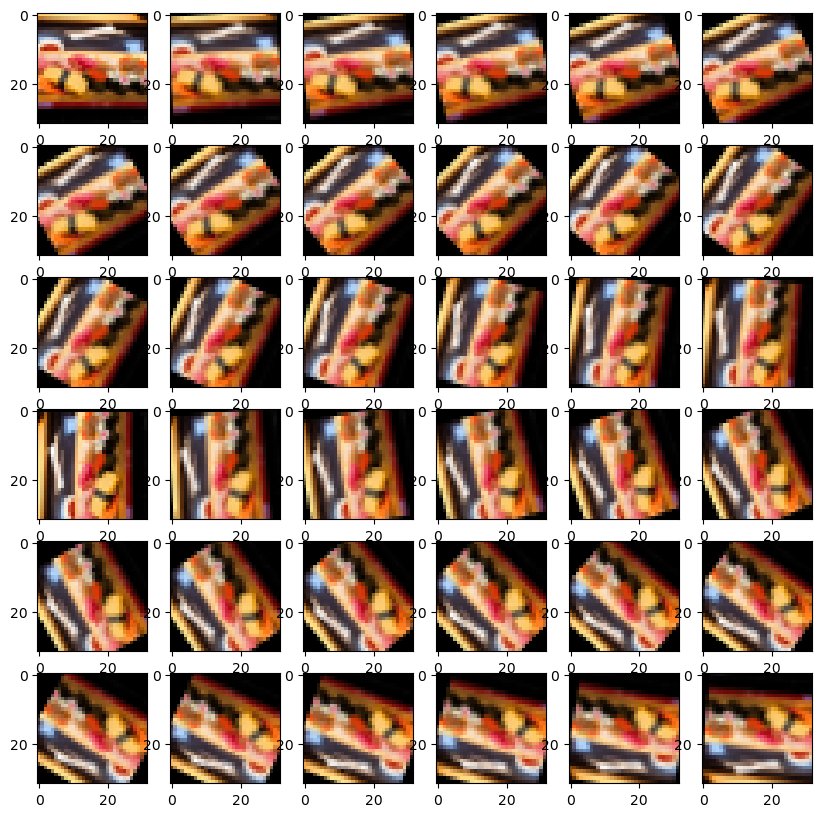

In [13]:
import matplotlib.pyplot as plt
import cv2

# 사진 데이터 읽어 들이기
photos = np.load('image/photos.npz')
x = photos['x']
img = x[250] # 250번 사진 하나만 선택하기

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    # 회전 시키기 
    center = (16, 16) # 회전 중심
    angle = i * 5 # 각도 조정
    scale = 1.0   # 확대 비율
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (32, 32))
    # 화면에 출력하기
    plt.imshow(img2)
plt.show()    

## 7. 이미지 증식 후 CNN 모델 학습

In [15]:
import cnn_model
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 입력과 출력 지정하기
im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 사진 데이터 읽어 들이기
photos = np.load('image/photos.npz')
X = photos['x']
y = photos['y']

# X 속성 데이터를 3차원 배열로 변환, 정규화하기
X = x.reshape(-1, im_rows, im_cols, im_color)
X = x.astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y = to_categorical(y.astype('int32'), nb_classes)

# 학습 전용과 테스트 전용으로 구분하기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=0)

# 검증 데이타 만들기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2,
                                                  random_state=0)

# 이미지 증식 - 학습 데이타만 적용(주의-테스트 데이타 증식 하지 않는다.)
x_new = []
y_new = []
for i, xi in enumerate(X_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 회전 시키기 
        center = (16, 16) # 회전 중심
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # 좌우 반전 
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)

# 이미지를 늘린 데이터를 학습 데이터로 사용하기
print('수량을 늘리기 전=', len(y_train))
X_train = np.array(x_new)
y_train = np.array(y_new)
print('수량을 늘린 후=', len(y_train))
print('-'*70)

수량을 늘리기 전= 192
수량을 늘린 후= 4608
----------------------------------------------------------------------


In [16]:
# CNN 모델 만들기 
model = cnn_model.get_model(in_shape, nb_classes)

# ModelCheckpoint, EarlyStopping 지정
# 딥러닝 모델을 저장할 디렉토리(폴더) 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/CNN_Cooking2.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습 
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
143/144 [============================>.] - ETA: 0s - loss: 1.0926 - acc: 0.3660
Epoch 1: val_loss improved from inf to 1.08516, saving model to ./model/CNN_Cooking2.hdf5
144/144 [==============================] - 4s 24ms/step - loss: 1.0923 - acc: 0.3674 - val_loss: 1.0852 - val_acc: 0.4583
Epoch 2/30
143/144 [============================>.] - ETA: 0s - loss: 0.9943 - acc: 0.5013
Epoch 2: val_loss improved from 1.08516 to 0.86711, saving model to ./model/CNN_Cooking2.hdf5
144/144 [==============================] - 3s 24ms/step - loss: 0.9935 - acc: 0.5017 - val_loss: 0.8671 - val_acc: 0.6042
Epoch 3/30
143/144 [============================>.] - ETA: 0s - loss: 0.8272 - acc: 0.6348
Epoch 3: val_loss improved from 0.86711 to 0.76541, saving model to ./model/CNN_Cooking2.hdf5
144/144 [==============================] - 4s 25ms/step - loss: 0.8274 - acc: 0.6343 - val_loss: 0.7654 - val_acc: 0.7500
Epoch 4/30
144/144 [==============================] - ETA: 0s - loss: 0.6881 - acc:

### 이미지를 증식한 후 학습한 모델 평가하기

In [17]:
# 모델 평가하기 
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 =', score[1], 'loss =', score[0])

2/2 [==============================] - 0s 10ms/step - loss: 0.7112 - acc: 0.7667
정답률 = 0.7666666507720947 loss = 0.7112083435058594


### 학습 과정 시각화

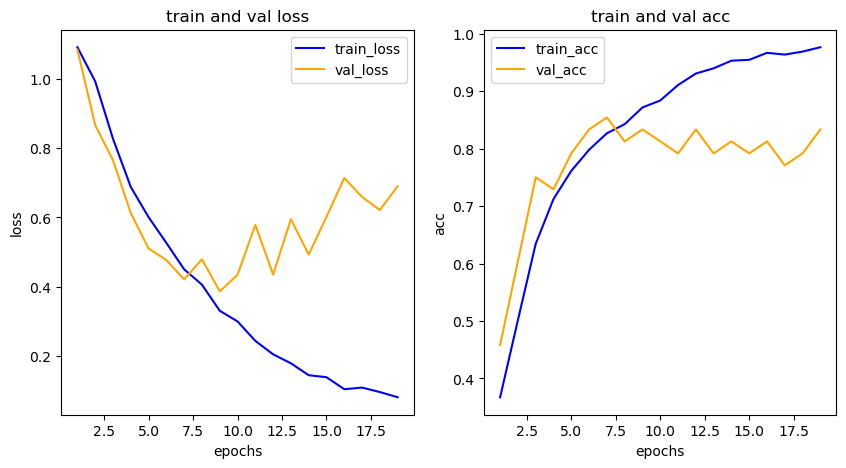

In [18]:
# 학습 과정 시각화 
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 데트스 손실(loss) 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 데이타 정확도(accuracy) 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

### 모델과 학습된 가중치 데이타 저장하기 
- CNN 모델 저장 => photos-cnn.h5
- 학습된 데이타 저장 => photos-cnn-weight.hdf5

In [19]:
# 모델 저장
model.save('./model/photos-cnn-model.h5')

In [20]:
# 학습된 가중치 데이타 저장
model.save_weights('./model/photos-cnn-weight.hdf5')

## 6. CNN 모델 예측하기
- 직접 찍은 사진으로 테스트 하기
- 칼로리표
    - 피자(한조각) : 266 kcal
    - 스파게티(100g) : 157 kcal
    - 스시(1인분) : 228 kcal

### 저장된 모델 및 가중치 불러오기
-  CNN 모델 읽기
    - model = load_model('./model/food-cnn.h5')
- 학습된 가중치 데이타 불러오기
    - model.load_weights('./model/food-cnn-weight.h5')

In [1]:
import os
os.getcwd()

'/Users/jeseung/Documents/Computer_Learnig/딥러닝 실무/1. CNN_요리이미지분류'

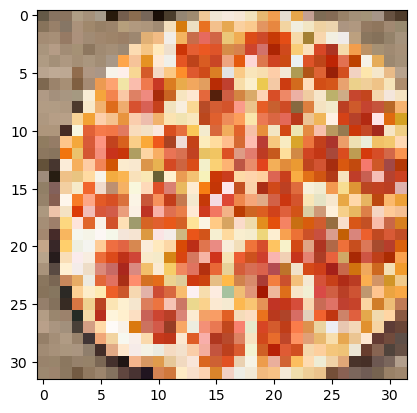

In [2]:
import cv2
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 레이블 정보 - 3개 레이블 클래스
labels = ["피자", "스파게티", "스시"]

# CNN 모델 읽기
model = load_model('./model/photos-cnn-model.h5')
# 학습된 데이타 불러오기
model.load_weights('./model/photos-cnn-weight.hdf5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('./img/test-pizza.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [3]:
# 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(in_shape).astype('float32') / 255

# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]

# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", round(float(acc * 100), 4))
    
print("---"*12)
idx = res.argmax()
per = float(round(res[idx] * 100, 4))
print("예측한 결과 = index :", idx, "\b,", str(round(per,4)) + "%")

1/1 [==============================] - 0s 101ms/step
피자 = 99.8679
스파게티 = 0.1319
스시 = 0.0002
------------------------------------
예측한 결과 = index : 0, 99.8679%


2023-07-20 15:45:02.479612: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


### 분류된 음식에 칼로리 출력하기

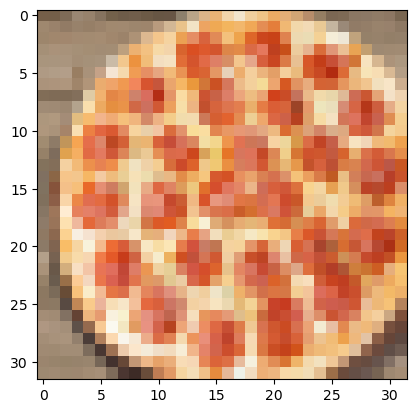

1/1 [==============================] - 0s 43ms/step
이 사진은 피자로(으로), 칼로리는 266 kcal입니다.
정확도는 99 %


In [4]:
import cnn_model
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# target_image = "test-sushi.jpg"

im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["피자", "스파게티", "스시"] # 레이블의 음식 이름
CALORIES = [266, 157, 228] # 각 레이블별 칼로리

# 저장한 CNN 모델 읽어 들이기
model = load_model('./model/photos-cnn-model.h5')
model.load_weights('./model/photos-cnn-weight.hdf5')

def check_photo(path):
    # 이미지 읽어 들이기
    img = Image.open(path)
    img = img.convert("RGB") # 색공간 변환하기
    img = img.resize((im_cols, im_rows)) # 크기 변경하기
    plt.imshow(img)
    plt.show()
    
    # 3차원으로 데이터 변환하기 + 정규화
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 예측하기
    pre = model.predict([x])[0]
#     print(pre)
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 응답하기
    print("이 사진은", LABELS[idx], "\b로(으로), 칼로리는", CALORIES[idx],"kcal입니다.")
    print("정확도는", per, "%")

# 메인 프로그램
if __name__ == '__main__':
    check_photo_str('./img/test-pizza.jpg')
#     check_photo_str('./test-spaghetti.jpg')
#     check_photo_str('./test-sushi.jpg')

### 예측 결과를 html 파일로 저장하기 --> predict-result.html

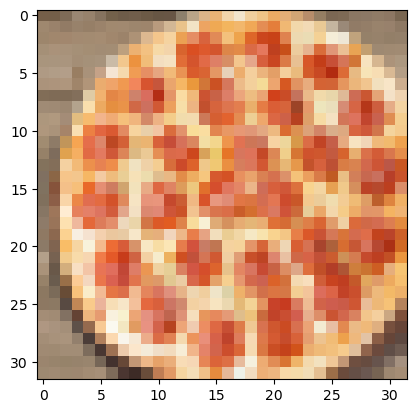

1/1 [==============================] - 0s 47ms/step
이 사진은 피자 로(으로), 칼로리는 266 kcal입니다.
예측 정확도는 99.483 %
----------------------------------------------------------------------------------------------------
<html><head><meta charset="utf8"></head>
    <body><h3>원본 이미지</h3><p>
    <img src='./img/test-pizza.jpg' width=400></p><div style="float:center;"><p><h3><딥러닝 결과> </p></h3><h3>이 사진은 피자로(으로), 칼로리는266kcal입니다.<p>예측 정확도는99.483% 입니다.</p><br></h3></div></body></html>
----------------------------------------------------------------------------------------------------
성공


In [5]:
import cnn_model
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# target_image = "test-pizza.jpg"

im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["피자", "스파게티", "스시"] # 레이블의 음식 이름
CALORIES = [266, 157, 228] # 각 레이블별 칼로리

# 저장한 CNN 모델 읽어 들이기
# model = cnn_model.get_model(in_shape, nb_classes)

# CNN 모델 읽기
model = load_model('./model/photos-cnn-model.h5')
# 학습된 데이타 불러오기
model.load_weights('./model/photos-cnn-weight.hdf5')
# M학습한 이미지 데이터에 형태 맞추기
# im = im.reshape(in_shape).astype('float32') / 255

def check_photo(path):
    # 이미지 읽어 들이기
    img = Image.open(path)
    img = img.convert("RGB") # 색공간 변환하기
    img = img.resize((im_cols, im_rows)) # 크기 변경하기
    plt.imshow(img)
    plt.show()
    
    # 데이터 변환하기
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 예측하기
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = round(float(pre[idx] * 100),3)
    return (idx, per)


result = [] # 여러개의 이미지 파일 예측결과를 리스트로 저장하기
def check_photo_str(path):
    idx, per = check_photo(path)
    # 응답하기
    print("이 사진은", LABELS[idx], "로(으로), 칼로리는", CALORIES[idx],"kcal입니다.")
    print("예측 정확도는", per, "%")
  
    # HTML로 저장하기------------------------------
    # 딥러닝 예측 결과 
    srcfile = path
    html = ""
    html = """<html><head><meta charset="utf8"></head>
    <body><h3>원본 이미지</h3><p>
    <img src='{0}' width=400></p>{1}""".format(path, html)
    
    res = "이 사진은 " + LABELS[idx] + "로(으로), 칼로리는" + str(CALORIES[idx]) +"kcal입니다."
    res = res + "<p>예측 정확도는" + str(per) + "% 입니다.</p><br>"
       
    s = '<div style="float:center;"><p><h3>'+ "<딥러닝 결과> "+'</p></h3><h3>' + res + '</h3>'+ '</div>'
    html += s
    end = "</body></html>"  
    html += end
    print('-'*100)
    print(html)
    print('-'*100)
    result.append(html)
    
    # html을 파일로 저장하기
    with open("./predict-result.html", "w", encoding="utf-8") as f:
        for item in result :
            f.writelines(item)
    print("성공")

if __name__ == '__main__':
    check_photo_str('./img/test-pizza.jpg')
#     check_photo_str('test-spaghetti.jpg')
#     check_photo_str('test-sushi.jpg')
